In [ ]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.shape)

(284807, 31)


In [5]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [6]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
print('Fraud Cases: {}'.format(len(fraud)))

Fraud Cases: 492


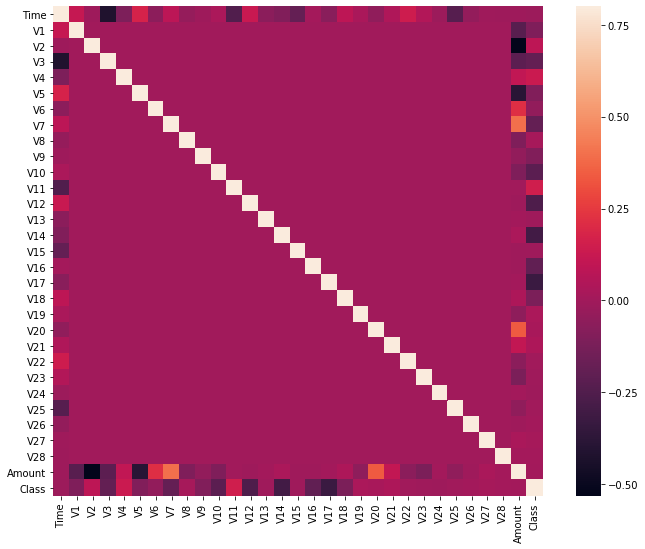

In [7]:
corrmat = data.corr()
fig = plt.figure(figsize = (12 , 9))
sns.heatmap(corrmat , vmax = 0.8 , square = True)
plt.show()

In [8]:
X = data.drop(['Class'] , axis = 1)
Y =data["Class"]
xData = X.values
yData = Y.values
print(xData)
print(yData)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]
[0 0 0 ... 0 0 0]


In [9]:
from sklearn.model_selection import train_test_split
xTrain , xTest , yTrain , yTest = train_test_split(xData , yData , test_size = 0.2 , random_state = 42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xTrain , yTrain)
ypred = rf.predict(xTest)

C:\Users\ashutosh yadav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [12]:
n_outliers = len(fraud) 
n_errors = (ypred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, ypred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, ypred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, ypred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, ypred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, ypred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9994557775359011
The precision is 0.9466666666666667
The recall is 0.7244897959183674
The F1-Score is 0.8208092485549132
The Matthews correlation coefficient is0.8279129910941151


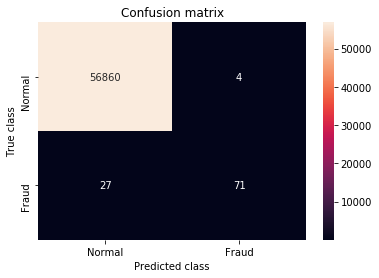

In [15]:
#finding confusion matrix
LABELS = ['Normal' , 'Fraud']
conf_matrix = confusion_matrix(yTest , ypred)
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 